# Definition

In the context of programming, a *function* is a named sequence of statements that performs a computation. When you define a function, you specify the name and the sequence of statements. Later, you can *call* the function by name.

# Function Calls

We have already seen one example of a function call:

In [1]:
typeof(42)

Int64

The name of the function is `typeof`. The expression in parentheses is called the *argument* of the function. The result, for this function, is the *type* of the argument.

It is common to say that a function *takes* an argument and *returns* a result. The result is also called the *return value*.

Julia (Python) provides functions that convert values from one type to another. The `parse`(`int`) function takes any value and converts it to an integer, if it can, or complains otherwise:

In [2]:
parse(Int, "32")

32

In [3]:
parse(Int, "Hello")

LoadError: [91mArgumentError: invalid base 10 digit 'H' in "Hello"[39m

In [4]:
using PyCall

In [5]:
py"int('32')"

32

In [6]:
py"int('Hello')"

LoadError: [91mPyError (ccall(@pysym(:PyEval_EvalCode), PyPtr, (PyPtr, PyPtr, PyPtr), o, globals, locals)) <class 'ValueError'>
ValueError("invalid literal for int() with base 10: 'Hello'",)
  File "/home/jupyter/.julia/v0.6/PyCall/src/pyeval.jl", line 1, in <module>
    const Py_single_input = 256  # from Python.h
[39m

`round, floor, ceil, trunc` (`int`) can convert floating-point values to integers.

In [7]:
round(Int, 3.99999)

4

In [8]:
trunc(Int, -2.3)

-2

In [9]:
py"int(3.99999)"

3

In [10]:
py"int(-2.3)"

-2

`float` converts integers and strings to floating-point numbers:

In [11]:
float(32)

32.0

In [12]:
float("3.14159")

3.14159

Finally, in Julia a value can be converted to a string by interpolation.

In [13]:
a = 32
"$a"

"32"

In Python `str` converts its argument to a string.

In [14]:
py"str(3.14159)"

"3.14159"

# Math functions

In Julia,  most of the familiar mathematical functions are directly available:

In [15]:
radians = 0.7
height = sin(radians)

0.644217687237691

Python has a math module that provides most of the familiar mathematical functions. A *module* is a file that contains a collection of related functions.

Before we can use the functions in a module, we have to import it with an import statement:
```python
import math
```
This statement creates a module object named math.

The module object contains the functions and variables defined in the module. To access one of the functions, you have to specify the name of the module and the name of the function, separated by a dot (also known as a period). This format is called dot notation.
```python
radians = 0.7
height = math.sin(radians)
```

C++ has a math library. Its header has to be included in the source before we can use the function in a library:
```C++
#include <math.h> 

auto radians {0.7};
auto height {sin(radians)};
```

The examples show that `sin` and the other trigonometric functions takes arguments in radians. To convert from degrees to radians, divide by `180` and multiply by `π`:

In [16]:
degrees = 45
radians = degrees / 180.0 * π
sin(radians)

0.7071067811865475

In Python: 
```python
degrees = 45
radians = degrees / 180.0 * math.pi
math.sin(radians)
```
In C++:
```C++
auto degrees {45};
auto radians {degrees / 180.0 * M_PI};
sin(radians);
```

# Composition

So far, we have looked at the elements of a program—variables, expressions, and statements—in isolation, without talking about how to combine them.

One of the most useful features of programming languages is their ability to take small building blocks and compose them. For example, the argument of a function can be any kind of expression, including arithmetic operators:


In [17]:
x = sin(degrees / 360.0 * 2 * π)

0.7071067811865475

And even function calls:

In [18]:
x = exp(log(x+1))

1.7071067811865475

Almost anywhere you can put a value, you can put an arbitrary expression, with one exception: the left side of an assignment statement has to be a variable name. Any other expression on the left side is a syntax error.

In [19]:
hours = 3
minutes = hours * 60

180

In [20]:
hours * 60 = minutes

LoadError: [91msyntax: "60" is not a valid function argument name[39m

# Adding new functions

So far, we have only been using the functions that come with Julia or Python, but it is also possible to add new functions. A function definition specifies the name of a new function and the sequence of statements that run when the function is called.

Here is an example in Julia:

In [21]:
function print_lyrics()
    println("I'm a lumberjack, and I'm okay.")
    println("I sleep all night and I work all day.")
end

print_lyrics (generic function with 1 method)

`function` is a keyword that indicates that this is a function definition. The name of the function is `print_lyrics`. The rules for function names are the same as for variable names: letters, numbers and underscore are legal, but the first character can’t be a number. You can’t use a keyword as the name of a function, and you should avoid having a variable and a function with the same name.

The empty parentheses after the name indicate that this function doesn’t take any arguments.

The first line of the function definition is called the header; the rest is called the body. The body is terminated with the `end` keyword. The body can contain any number of statements.

Python:
```python
def print_lyrics():
    print("I'm a lumberjack, and I'm okay.")
    print("I sleep all night and I work all day.")
```

`def` is a keyword that indicates that this is a function definition. The name of the function is `print_lyrics`. The rules for function names are the same as for variable names: letters, numbers and underscore are legal, but the first character can’t be a number. You can’t use a keyword as the name of a function, and you should avoid having a variable and a function with the same name.

The empty parentheses after the name indicate that this function doesn’t take any arguments.

The first line of the function definition is called the header; the rest is called the body. The header has to end with a colon and the body has to be indented. By convention, indentation is always four spaces. The body can contain any number of statements.

C++:
```C++
void print_lyrics(){
    std::cout << "I'm a lumberjack, and I'm okay." << std::endl;
    std::cout << "I sleep all night and I work all day." << std::endl;
}
```
`void` is a keyword indicating that the function returns nothing. The name of the function is `print_lyrics`. The rules for function names are the same as for variable names: letters, numbers and underscore are legal, but the first character can’t be a number. You can’t use a keyword as the name of a function, and you should avoid having a variable and a function with the same name.

The empty parentheses after the name indicate that this function doesn’t take any arguments.

The first line of the function definition is called the header; the rest is called the body. The body starts with `{` and ends with `}`. The body can contain any number of statements.

Defining a function creates a function object, which is a subtype of `Function`:

In [22]:
isa(print_lyrics, Function)

true

The syntax for calling the new function is the same as for built-in functions:

In [23]:
print_lyrics()

I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.


Once you have defined a function, you can use it inside another function. For example, to repeat the previous refrain, we could write a function called `repeat_lyrics`:

In [24]:
function repeat_lyrics()
    print_lyrics()
    print_lyrics()
end

repeat_lyrics (generic function with 1 method)

And then call repeat_lyrics:

In [25]:
repeat_lyrics()

I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.
I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.


But that’s not really how the song goes.

# Definitions and Uses

Pulling together the code fragments from the previous section, the whole program looks like this:
```julia
function print_lyrics()
    println("I'm a lumberjack, and I'm okay.")
    println("I sleep all night and I work all day.")
end

function repeat_lyrics()
    print_lyrics()
    print_lyrics()
end

repeat_lyrics()
```

This program contains two function definitions: `print_lyrics` and `repeat_lyrics`. Function definitions get executed just like other statements, but the effect is to create function objects. The statements inside the function do not run until the function is called, and the function definition generates no output.

As you might expect, you have to create a function before you can run it. In other words, the function definition has to run before the function gets called.

# Flow of Execution

To ensure that a function is defined before its first use, you have to know the order statements run in, which is called the *flow of execution*.

Execution always begins at the first statement of the program. Statements are run one at a time, in order from top to bottom.

Function definitions do not alter the flow of execution of the program, but remember that statements inside the function don’t run until the function is called.

A function call is like a detour in the flow of execution. Instead of going to the next statement, the flow jumps to the body of the function, runs the statements there, and then comes back to pick up where it left off.

That sounds simple enough, until you remember that one function can call another. While in the middle of one function, the program might have to run the statements in another function. Then, while running that new function, the program might have to run yet another function!

Fortunately, programs are good at keeping track of where they are, so each time a function completes, the program picks up where it left off in the function that called it. When it gets to the end of the program, it terminates.

In summary, when you read a program, you don’t always want to read from top to bottom. Sometimes it makes more sense if you follow the flow of execution.

# Parameters and Arguments

Some of the functions we have seen require *arguments*. For example, when you call `sin` you pass a number as an argument. Some functions take more than one argument: `log` takes two, the base and the value.

Inside the function, the arguments are assigned to variables called *parameters*. Here is a definition for a function that takes an argument:

In [26]:
function print_twice(bruce)
    println(bruce)
    println(bruce)
end

print_twice (generic function with 1 method)

This function assigns the argument to a parameter named `bruce`. When the function is called, it prints the value of the parameter (whatever it is) twice.

In [27]:
print_twice("Spam")

Spam
Spam


In [28]:
print_twice(42)

42
42


The same rules of composition that apply to built-in functions also apply to programmer-defined functions, so we can use any kind of expression as an argument for `print_twice`:

In [29]:
print_twice("Spam "^4)

Spam Spam Spam Spam 
Spam Spam Spam Spam 


In [30]:
print_twice(cos(π))

-1.0
-1.0


The argument is evaluated before the function is called, so in the examples the expressions `"Spam "^4` and `cos(π)` are only evaluated once.

You can also use a variable as an argument:

In [31]:
michael = "Eric, the half a bee."
print_twice(michael)

Eric, the half a bee.
Eric, the half a bee.


The name of the variable we pass as an argument (`michael`) has nothing to do with the name of the parameter (`bruce`). It doesn’t matter what the value was called back home (in the caller); here in `print_twice`, we call everybody `bruce`.

# Variables and Parameters are local

When you create a variable inside a function, it is *local*, which means that it only exists inside the function. For example:

In [32]:
function cat_twice(part1, part2)
    concat = part1 * part2
    print_twice(concat)
end

cat_twice (generic function with 1 method)

This function takes two arguments, concatenates them, and prints the result twice. Here is an example that uses it:

In [33]:
line1 = "Bing tiddle "
line2 = "tiddle bang."
cat_twice(line1, line2)

Bing tiddle tiddle bang.
Bing tiddle tiddle bang.


When `cat_twice` terminates, the variable `cat` is destroyed. If we try to print it, we get an exception:

In [34]:
println(concat)

LoadError: [91mUndefVarError: concat not defined[39m

Parameters are also local. For example, outside `print_twice`, there is no such thing as `bruce`.

# Stack Diagrams

To keep track of which variables can be used where, it is sometimes useful to draw a *stack diagram*. Like state diagrams, stack diagrams show the value of each variable, but they also show the function each variable belongs to.

Each function is represented by a *frame*. A frame is a box with the name of a function beside it and the parameters and variables of the function inside it.

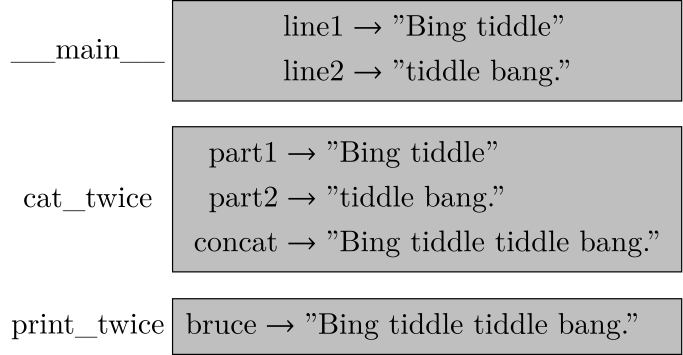

In [35]:
using TikzPictures
TikzPicture(L"""
    \node (main) [draw, fill=lightgray, minimum width=6cm] {$\begin{aligned}
    \textrm{line1}&\rightarrow \textrm{"Bing tiddle"}\\
    \textrm{line2}&\rightarrow \textrm{"tiddle bang."}
    \end{aligned}$};
    \node [left of=main, xshift=-3cm] {\textrm{\_\_main\_\_}};
    \node (cat) [draw, fill=lightgray, below of=main, yshift=-0.75cm,minimum width=6cm] {$\begin{aligned}
    \textrm{part1}&\rightarrow \textrm{"Bing tiddle"}\\
    \textrm{part2}&\rightarrow \textrm{"tiddle bang."}\\
    \textrm{concat}&\rightarrow \textrm{"Bing tiddle tiddle bang."}
    \end{aligned}$};
    \node [left of=cat, xshift=-3cm] {\textrm{cat\_twice}};
    \node (print) [draw, fill=lightgray, below of=cat, yshift=-0.5cm,minimum width=6cm] {$\begin{aligned}
    \textrm{bruce}&\rightarrow \textrm{"Bing tiddle tiddle bang."}
    \end{aligned}$};
    \node [left of=print, xshift=-3cm] {\textrm{print\_twice}};
"""; options="very thick, scale=3, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
""")

The frames are arranged in a stack that indicates which function called which, and so on. In this example, `print_twice` was called by `cat_twice`, and cat_twice was called by `__main__`, which is a special name for the topmost frame. When you create a variable outside of any function, it belongs to `__main__`.

Each parameter refers to the same value as its corresponding argument. So, `part1` has the same value as `line1`, `part2` has the same value as `line2`, and `bruce` has the same value as `cat`.

If an error occurs during a function call, Julia and Python print the name of the function, the name of the function that called it, and the name of the function that called that, all the way back to `__main__`.

For example, if you try to access `concat` from within print_twice, you get an `UndefVarError`:

In [36]:
function print_twice(bruce)
    println(concat)
    println(bruce)
end

print_twice (generic function with 1 method)

In [37]:
cat_twice(line1, line2)

LoadError: [91mUndefVarError: concat not defined[39m

This list of functions is called a `traceback`. It tells you what program file the error occurred in, and what line, and what functions were executing at the time. It also shows the line of code that caused the error.

The order of the functions in the traceback is the same as the order of the frames in the stack diagram. The function that is currently running is at the bottom.

# Fruitful Functions and Void Functions

Some of the functions we have used, such as the math functions, return results; for lack of a better name, I call them fruitful functions. Other functions, like `print_twice`, perform an action but don’t return a value. They are called `void` functions.

When you call a fruitful function, you almost always want to do something with the result; for example, you might assign it to a variable or use it as part of an expression:

In [38]:
x = cos(radians)
golden = (sqrt(5) + 1) / 2

1.618033988749895

When you call a function in interactive mode, Julia and Python display the result. 

But in a script, if you call a fruitful function all by itself, the return value is lost forever!

Void functions might display something on the screen or have some other effect, but they don’t have a return value. If you assign the result to a variable, you get a special value called `nothing`.

In [39]:
function print_twice(bruce)
    println(bruce)
    println(bruce)
end

print_twice (generic function with 1 method)

In [40]:
result = print_twice("Bing")

Bing
Bing


In [41]:
println(result)

nothing


The value `nothing` is not the same as the string `"nothing"`. It is a special value that has its own type:

In [42]:
typeof(nothing)

Void

The functions we have written so far are all `Void`. We will start writing fruitful functions in a few lectures.

# Why Functions?

It may not be clear why it is worth the trouble to divide a program into functions. There are several reasons:

- Creating a new function gives you an opportunity to name a group of statements, which makes your program easier to read and debug.

- Functions can make a program smaller by eliminating repetitive code. Later, if you make a change, you only have to make it in one place.

- Dividing a long program into functions allows you to debug the parts one at a time and then assemble them into a working whole.

- Well-designed functions are often useful for many programs. Once you write and debug one, you can reuse it.

# Case study: Interface Design

This section presents a case study that demonstrates a process for designing functions that work together.

It introduces the turtle module, which allows you to create images using turtle graphics. 

## The Turtle Module

To check whether you have the Turtle module, type

In [43]:
using Luxor
🐢 = Turtle()

Luxor.Turtle(0.0, 0.0, true, 0.0, (0.0, 0.0, 0.0))

As in Python, a module in Julia is a file that contains a collection of related functions.

Before we can use the functions in a module, we have to import it with an `using` statement:
```julia
using Luxor
```

This statement creates a module object named `Luxor` and all exported functions are directly available.

The `Luxor` module provides a function called `Turtle` that creates a Turtle object, which we assign to a variable named 🐢.

Once you create a Turtle, you can call a function to move it around a drawing. For example, to move the turtle forward:

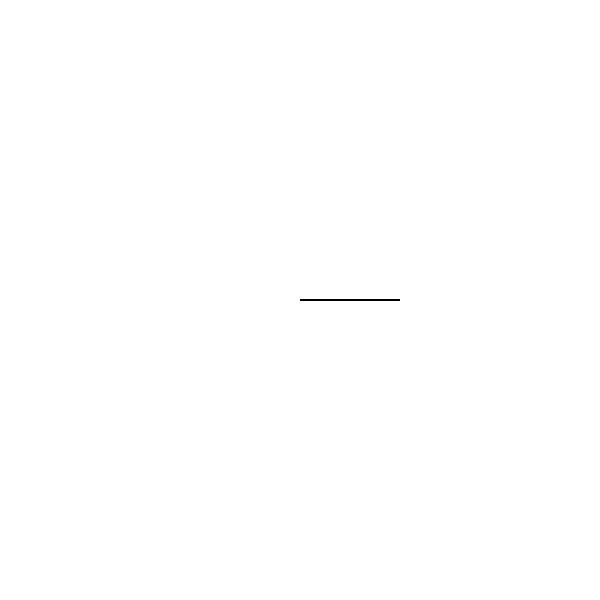

In [44]:
@svg begin
    Forward(🐢, 100)
end

The `@svg` keyword starts a macro that draws a svg picture. Macros are an important feature of Julia. We will use them but we won't detail how to create them.

The arguments of `Forward` are the Turtle and a distance in pixels, so the actual size depends on your display.

Another you can call on a Turtle is `Turn` for turning. The second argument for `Turn` is an angle in degrees.

Also, each Turtle is holding a pen, which is either down or up; if the pen is down, the Turtle leaves a trail when it moves. The functions `Penup` and `Pendown` stand for “pen up” and “pen down”.

To draw a right angle:

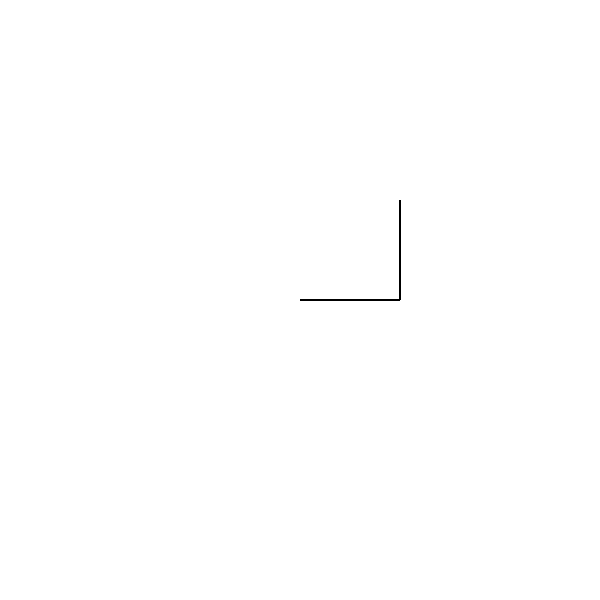

In [45]:
🐢 = Turtle()
@svg begin
    Forward(🐢, 100)
    Turn(🐢, -90)
    Forward(🐢, 100)
end

When you run this program, you should see the Turtle move east and then north, leaving two line segments behind.

Now modify the program to draw a square. Don’t go on until you’ve got it working!

## Simple repetition

Chances are you wrote something like this:

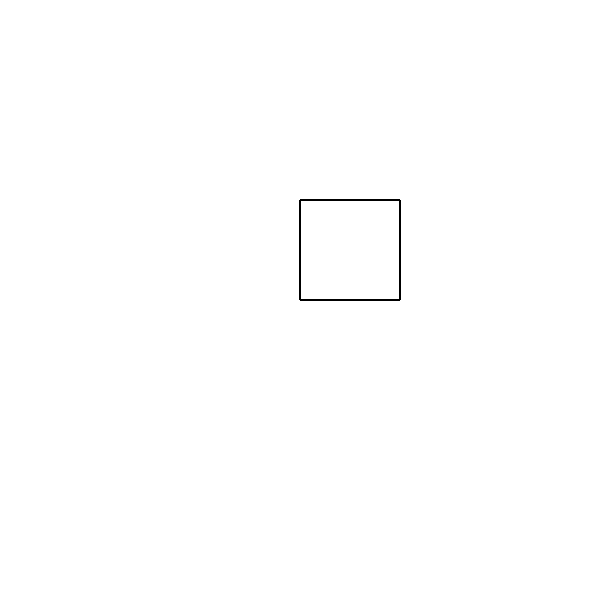

In [46]:
🐢 = Turtle()
@svg begin
    Forward(🐢, 100)
    Turn(🐢, -90)
    Forward(🐢, 100)
    Turn(🐢, -90)
    Forward(🐢, 100)
    Turn(🐢, -90)
    Forward(🐢, 100)
end

We can do the same thing more concisely with a `for`
 statement.

In [47]:
for i in 1:4
    println("Hello!")
end

Hello!
Hello!
Hello!
Hello!


This is the simplest use of the for statement; we will see more later. But that should be enough to let you rewrite your square-drawing program. Don’t go on until you do.

Here is a `for` statement that draws a square:

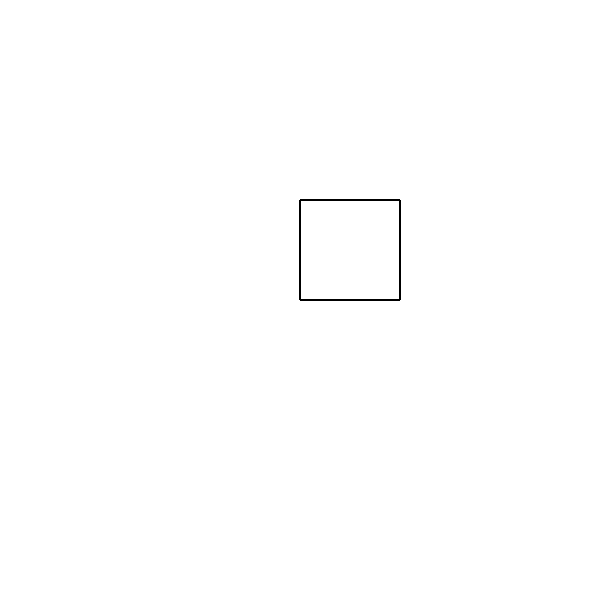

In [48]:
🐢 = Turtle()
@svg begin
    for i in 1:4
        Forward(🐢, 100)
        Turn(🐢, -90)
    end
end

The syntax of a `for` statement is similar to a function definition. It has a header and a body. The body can contain any number of statements and is terminated with the `end` keyword.

A `for` statement is also called a loop because the flow of execution runs through the body and then loops back to the top. In this case, it runs the body four times.

This version is actually a little different from the previous square-drawing code because it makes another turn after drawing the last side of the square. The extra turn takes more time, but it simplifies the code if we do the same thing every time through the loop. This version also has the effect of leaving the turtle back in the starting position, facing in the starting direction.

In python, the `for` statement is similar:
```python
for i in range(4):
    print('Hello!)
```
The syntax of a `for` statement is similar to a function definition. It has a header that ends with a colon and an indented body. The body can contain any number of statements.

In C++, the `for` statement is more complicated:
```C++
for(int i=0; i<=3; i++){
    std::cout << "Hello!" << std::endl;
}
```
The syntax of a `for` statement is similar to a function definition. It has a header and a body. The body can contain any number of statements and starts with the `{` and ends with `}`. The header has 3 fields separated by a `;`:

- `int i=0`, initializes the loop variable `i`
- `i<=3`, gives the running condition
- `i++`, gives the increment of `i`

## Exercises

The following is a series of exercises using TurtleWorld. They are meant to be fun, but they have a point, too. While you are working on them, think about what the point is.

The following sections have solutions to the exercises, so don’t look until you have finished (or at least tried).

- Write a function called `square` that takes a parameter named `t`, which is a turtle. It should use the turtle to draw a square. Write a function call that passes `🐢` as an argument to `square`, and then run again.

- Add another parameter, named `length`, to `square`. Modify the body so length of the sides is `length`, and then modify the function call to provide a second argument. Run again. Test your program with a range of values for `length`.

- Make a copy of `square` and change the name to `polygon`. Add another parameter named `n` and modify the body so it draws an n-sided regular polygon. Hint: The exterior angles of an n-sided regular polygon are `360/n` degrees.

- Write a function called `circle` that takes a turtle, `t`, and radius, `r`, as parameters and that draws an approximate circle by calling polygon with an appropriate length and number of sides. Test your function with a range of values of `r`.

Hint: figure out the circumference of the circle and make sure that `length * n = circumference`.

- Make a more general version of circle called `arc` that takes an additional parameter `angle`, which determines what fraction of a circle to draw. `angle` is in units of degrees, so when `angle=360`, `arc` should draw a complete circle.

## Encapsulation

The first exercise asks you to put your square-drawing code into a function definition and then call the function, passing the turtle as a parameter. Here is a solution:

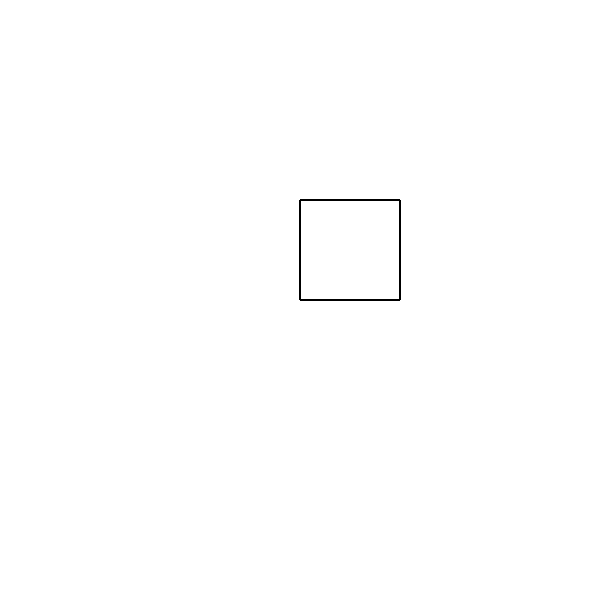

In [66]:
function square(t)
    for i in 1:4
        Forward(t, 100)
        Turn(t, -90)
    end
end
🐢 = Turtle()
@svg begin
    square(🐢)
end

Inside the function, `t` refers to the same turtle `🐢`, so `Turn(t, 90)` has the same effect as `Turn(🐢, 90)`. In that case, why not call the parameter `🐢`? The idea is that `t` can be any turtle, not just `🐢`, so you could create a second turtle and pass it as an argument to square:

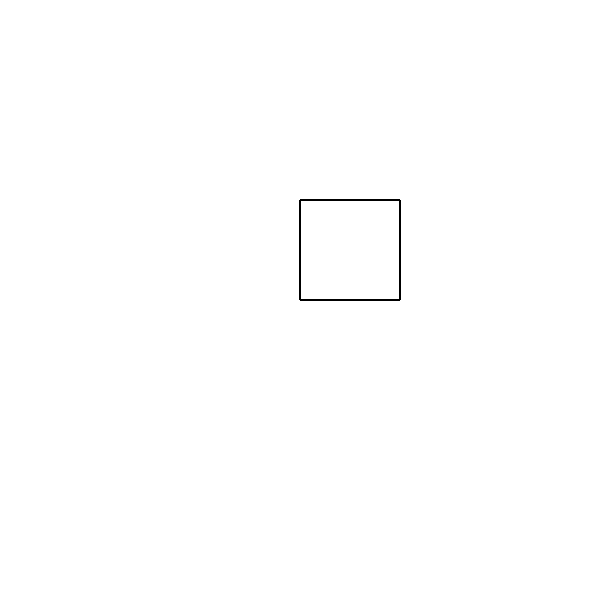

In [50]:
🐸 = Turtle()
@svg begin
   square(🐸) 
end

Wrapping a piece of code up in a function is called *encapsulation*. One of the benefits of encapsulation is that it attaches a name to the code, which serves as a kind of documentation. Another advantage is that if you re-use the code, it is more concise to call a function twice than to copy and paste the body!

## Generalization

The next step is to add a `length` parameter to `square`. Here is a solution:

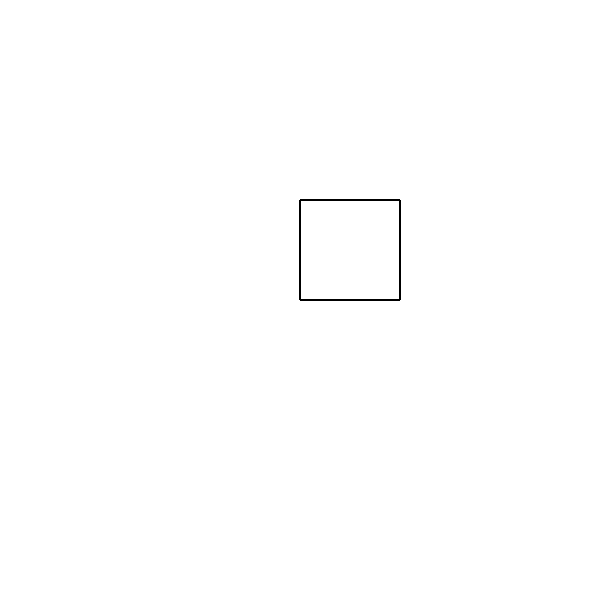

In [68]:
function square(t, length)
    for i in 1:4
        Forward(t, length)
        Turn(t, -90)
    end
end
🐢 = Turtle()
@svg begin
    square(🐢, 100)
end

Adding a parameter to a function is called `generalization` because it makes the function more general: in the previous version, the square is always the same size; in this version it can be any size.

The next step is also a generalization. Instead of drawing squares, polygon draws regular polygons with any number of sides. Here is a solution:

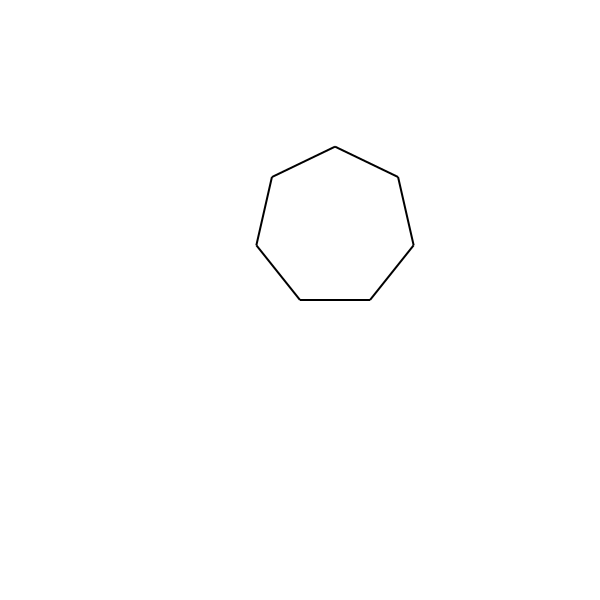

In [67]:
function polygon(t, n, length)
    angle = 360 / n
    for i in 1:n
        Forward(t, length)
        Turn(t, -angle)
    end
end
🐢 = Turtle()
@svg begin
    polygon(🐢, 7, 70)
end

## Interface design

The next step is to write `circle`, which takes a radius, `r`, as a parameter. Here is a simple solution that uses `polygon` to draw a 50-sided polygon:


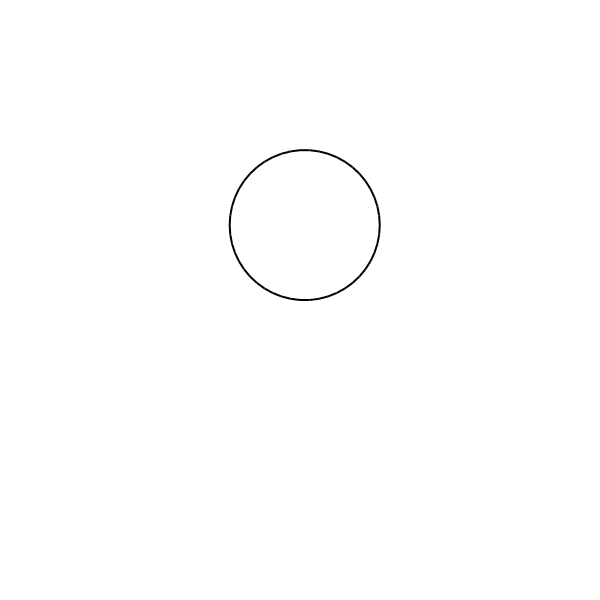

In [57]:
function circle(t, r)
    circumference = 2 * π * r
    n = 50
    length = circumference / n
    polygon(t, n, length)
end
🐢 = Turtle()
@svg begin
    circle(🐢, 75)
end

The first line computes the circumference of a circle with radius `r` using the formula `2 π r`. `n` is the number of line segments in our approximation of a circle, so `length` is the length of each segment. Thus, `polygon` draws a 50-sided polygon that approximates a circle with radius `r`.

One limitation of this solution is that `n` is a constant, which means that for very big circles, the line segments are too long, and for small circles, we waste time drawing very small segments. One solution would be to generalize the function by taking `n` as a parameter. This would give the user (whoever calls circle) more control, but the interface would be less clean.

The interface of a function is a summary of how it is used: what are the parameters? What does the function do? And what is the return value? An interface is “clean” if it allows the caller to do what they want without dealing with unnecessary details.

In this example, `r` belongs in the interface because it specifies the circle to be drawn. `n` is less appropriate because it pertains to the details of how the circle should be rendered.

Rather than clutter up the interface, it is better to choose an appropriate value of `n` depending on circumference:

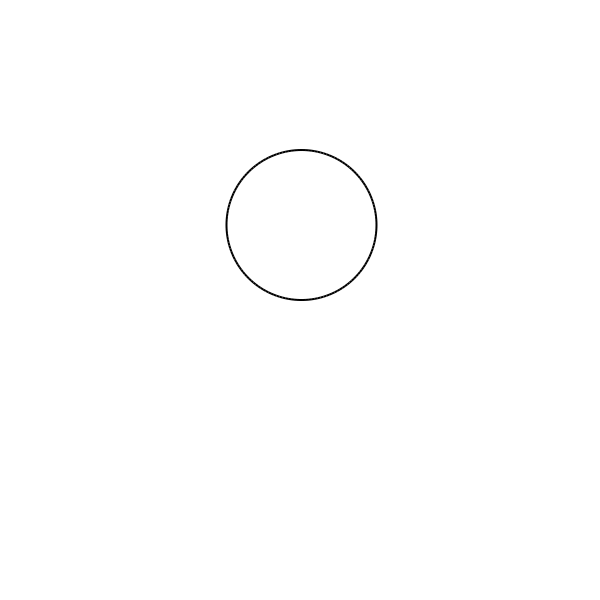

In [59]:
function circle(t, r)
    circumference = 2 * π * r
    n = trunc(circumference / 3) + 1
    length = circumference / n
    polygon(t, n, length)
end
🐢 = Turtle()
@svg begin
    circle(🐢, 75)
end

Now the number of segments is an integer near `circumference/3`, so the length of each segment is approximately `3`, which is small enough that the circles look good, but big enough to be efficient, and acceptable for any size circle.

## Refactoring

When I wrote `circle`, I was able to re-use `polygon` because a many-sided polygon is a good approximation of a circle. But `arc` is not as cooperative; we can’t use `polygon` or `circle` to draw an arc.

One alternative is to start with a copy of `polygon` and transform it into `arc`. The result might look like this:

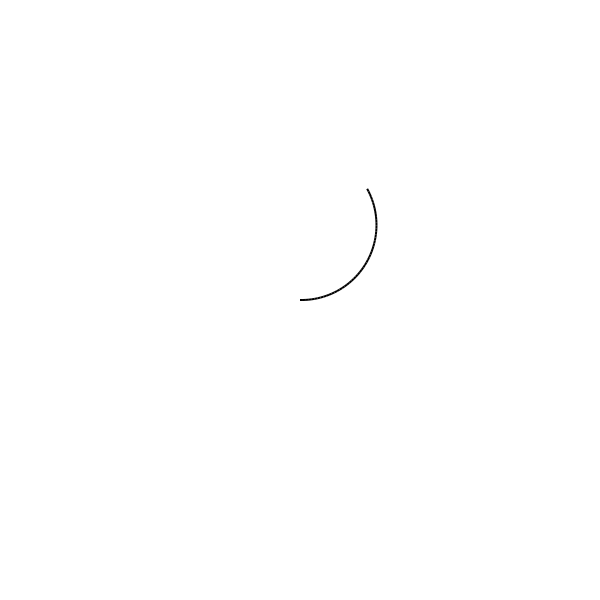

In [62]:
function arc(t, r, angle)
    arc_length = 2 * π * r * angle / 360
    n = trunc(arc_length / 3) + 1
    step_length = arc_length / n
    step_angle = angle / n
    for i in 1:n
        Forward(t, step_length)
        Turn(t, -step_angle)
    end
end
🐢 = Turtle()
@svg begin
    arc(🐢, 75, 120)
end

The second half of this function looks like `polygon`, but we can’t re-use `polygon` without changing the interface. We could generalize `polygon` to take an `angle` as a third argument, but then `polygon` would no longer be an appropriate name! Instead, let’s call the more general function `polyline`:

In [63]:
function polyline(t, n, length, angle)
    for i in 1:n
        Forward(t, length)
        Turn(t, -angle)
    end
end

polyline (generic function with 1 method)

Now we can rewrite `polygon` and `arc` to use `polyline`:

In [64]:
function polygon(t, n, length)
    angle = 360 / n
    polyline(t, n, length, angle)
end

polygon (generic function with 1 method)

In [65]:
function arc(t, r, angle)
    arc_length = 2 * π * r * angle / 360
    n = trunc(arc_length / 3) + 1
    step_length = arc_length / n
    step_angle = angle / n
    polyline(t, n, step_length, step_angle)
end

arc (generic function with 1 method)

Finally, we can rewrite `circle` to use `arc`:

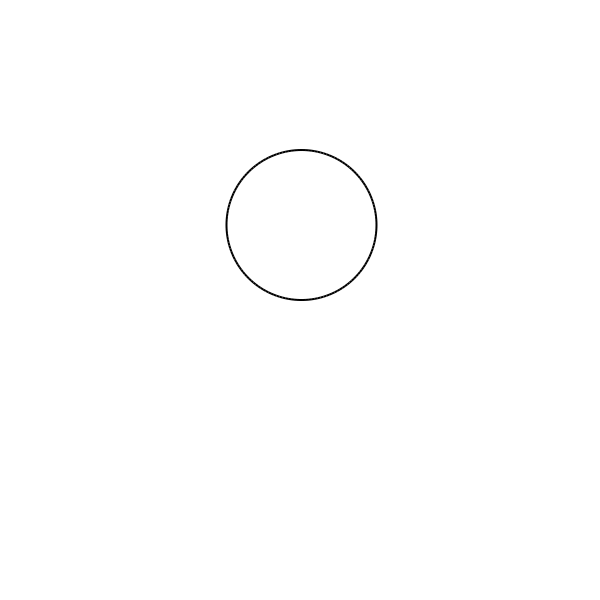

In [69]:
function circle(t, r)
    arc(t, r, 360)
end
🐢 = Turtle()
@svg begin
    circle(🐢, 75)
end